
Running k-means for k=2
Converged after 4 iterations.


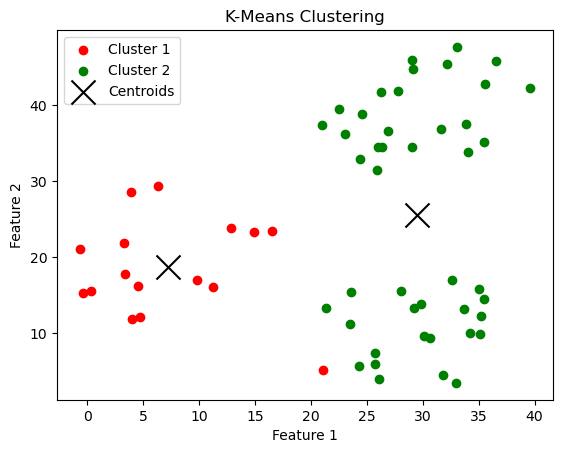


Running k-means for k=3
Converged after 7 iterations.


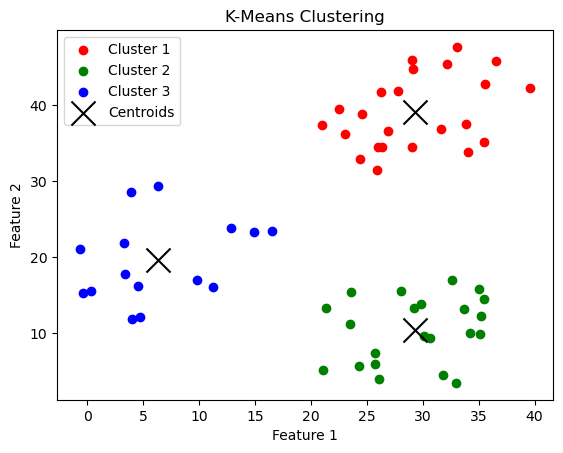

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset from CSV file
data = pd.read_csv('kmeans - kmeans_blobs.csv')

# Extract features from the dataset
X = data.iloc[:, [0, 1]].values  # Assuming first two columns are features

# Number of clusters
k_values = [2, 3]

# Function to initialize centroids randomly
def initialize_centroids(k):
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]
    return centroids

# Function to calculate Euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Function to assign each data point to the nearest centroid
def assign_clusters(X, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for point in X:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_index = np.argmin(distances)
        clusters[cluster_index].append(point)
    return clusters

# Function to update centroids based on the mean of the points assigned to each cluster
def update_centroids(clusters):
    centroids = [np.mean(cluster, axis=0) for cluster in clusters]
    return centroids

# Function to visualize the clusters
def plot_clusters(X, clusters, centroids):
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    for i, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], label='Cluster ' + str(i + 1))
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=300, c='k', label='Centroids')
    plt.title('K-Means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Main k-means algorithm
for k in k_values:
    print(f"\nRunning k-means for k={k}")
    centroids = initialize_centroids(k)
    prev_centroids = centroids.copy()
    max_iterations = 100
    for i in range(max_iterations):
        clusters = assign_clusters(X, centroids)
        centroids = update_centroids(clusters)
        if np.allclose(prev_centroids, centroids, atol=1e-4):
            print(f"Converged after {i+1} iterations.")
            break
        prev_centroids = centroids.copy()
    else:
        print("Did not converge.")
    plot_clusters(X, clusters, np.array(centroids))